# Etivity 5 Higher Dimensions
## Name: Martin Power
## ID      : 9939245

You may add two extra libraries: one to make a train-test split and one to perform a grid search

In [79]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import math

# Additional two libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Also adding Pandas to import CSVs
import pandas as pd

Sample code to plot SVM margin, 'gutters' and support vectors

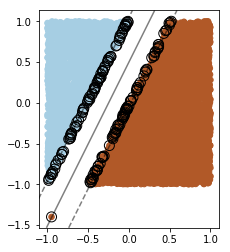

In [24]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)


# plot the decision function
ax = plt.gca()
ax.set_aspect(aspect=1)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.best_estimator_.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.best_estimator_.support_vectors_[:, 0], clf.best_estimator_.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')



# Task 4

In [18]:
df1 = pd.read_csv("./dataset_1.csv")
df1 = df1.drop(['Unnamed: 0'],axis=1)
df1.describe()

,0,1,2
count,10001.000000,10001.000000,10001.000000
mean,0.082508,-0.004040,0.668233
std,0.615153,0.575639,0.470871
min,-0.999635,-1.400000,0.000000
25%,-0.496767,-0.496319,0.000000
50%,0.208210,-0.006960,1.000000
75%,0.614940,0.491170,1.000000
max,0.999983,0.999918,1.000000


In [19]:
df1.head()

,0,1,2
0,-0.331982,-0.926029,1.0
1,-0.819310,-0.242368,0.0
2,0.922427,0.499088,1.0
3,-0.570793,0.562286,0.0
4,0.375817,-0.941165,1.0


In [ ]:
df1.tail()

In [22]:
# target attribute
y = df1['2']

# predictor attributes
X = df1.drop('2', axis=1).values

In [23]:
def print_dataset(X, y):
    # Plot the dataset
    
    # Assign colours based on the labels (1,-1) = (steelblue,darkred)
    colors = ['steelblue' if label == 1 else 'darkred' for label in y]
       
    # Plot Training Data
    plt.rcParams["figure.figsize"] = (10, 5) 
    plt.title("Dataset")
    plt.scatter(X[:,0], X[:,1], color=colors) 
    
    plt.show() 

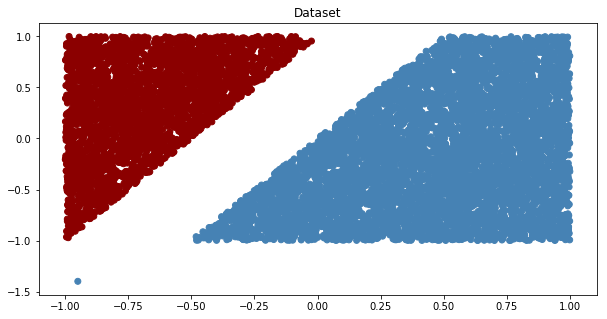

In [24]:
print_dataset(X,y)

In [26]:
# Split into test set and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

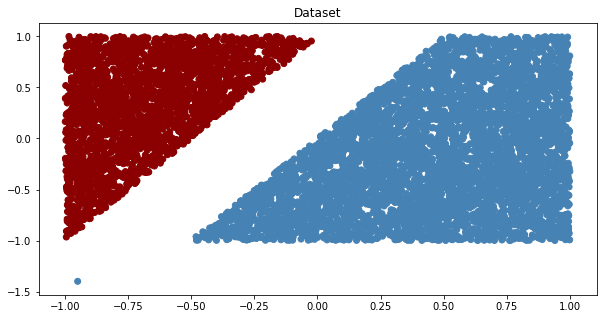

In [27]:
print_dataset(X_train,y_train)

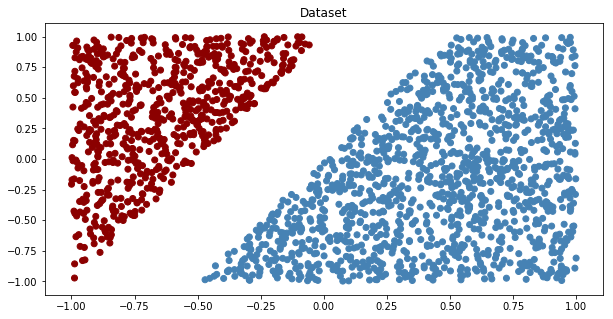

In [28]:
print_dataset(X_test,y_test)

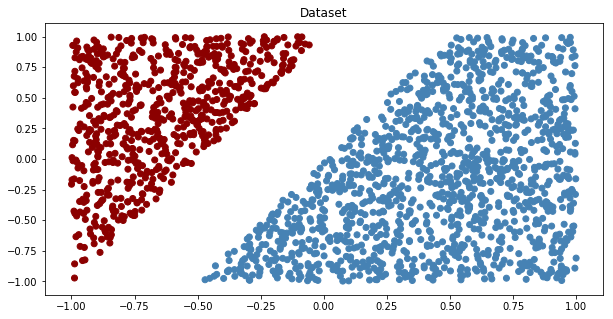

In [32]:
# Set kernel to 'linear' for task4
t4_kernel = 'linear'

t4_svm = svm.SVC(kernel=t4_kernel)
t4_svm.fit(X_train,y_train)
t4_svm.score(X_test,y_test)

yhat = t4_svm.predict(X_test)

print_dataset(X_test,yhat)

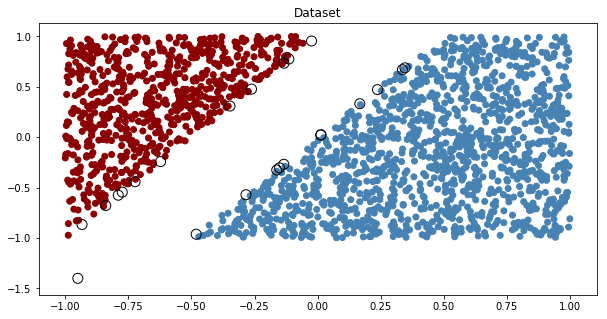

In [34]:
# Assign colours based on the labels (1,-1) = (steelblue,darkred)
colors = ['steelblue' if label == 1 else 'darkred' for label in y_test]

# Plot Training Data
plt.rcParams["figure.figsize"] = (10, 5) 
plt.title("Dataset")
plt.scatter(X_test[:,0], X_test[:,1], color=colors) 

plt.scatter(t4_svm.support_vectors_[:, 0], t4_svm.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.show() 

In [60]:
def plot_svm_results(svmc, X, y):

    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    ax.set_aspect(aspect=1)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svmc.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(svmc.support_vectors_[:, 0], svmc.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    
    # Annotate Graph
    plt.title('SVM with C = ' + str(svmc.C) + " and kernel = " + svmc.kernel)
    #plt.title('Accuracy Boxplot with Number of Selected Features = ')
    
    plt.show()

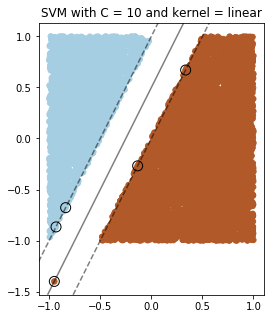

In [61]:
plot_svm_results(t4_svm, X_train, y_train)

In [62]:
print(t4_svm.C)

10


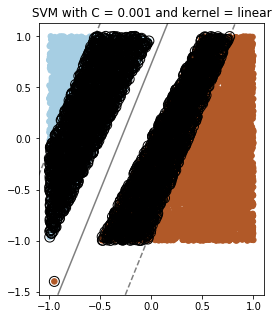

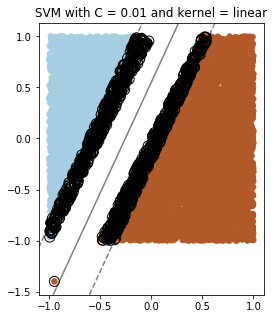

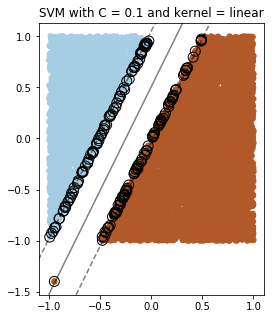

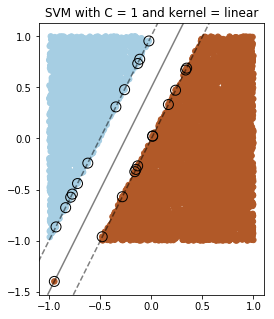

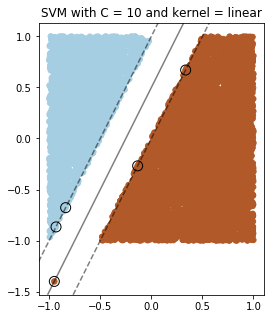

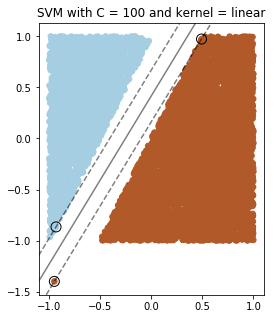

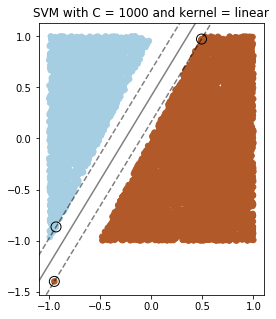

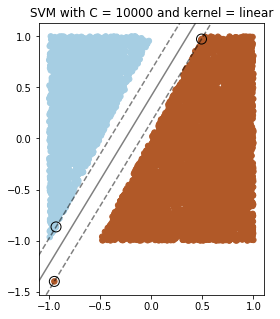

In [65]:
t4_C_vals = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

for i in range(len(t4_C_vals)):
    # Set kernel to 'linear' for task4
    t4_kernel = 'linear'

    t4_svm = svm.SVC(kernel=t4_kernel, C=t4_C_vals[i])
    t4_svm.fit(X_train,y_train)
    t4_svm.score(X_test,y_test)

    #yhat = t4_svm.predict(X_test)
    
    plot_svm_results(t4_svm, X_train, y_train)

In [70]:
df2 = pd.read_csv("./dataset_2.csv")
df2 = df2.drop(['Unnamed: 0'],axis=1)
df2.describe()

,0,1,2
count,10000.000000,10000.000000,10000.000000
mean,0.000081,-0.000563,0.332800
std,0.574913,0.274366,0.471239
min,-0.999780,-0.951513,0.000000
25%,-0.506704,-0.182047,0.000000
50%,0.001152,-0.002540,0.000000
75%,0.494439,0.180595,1.000000
max,0.999979,0.956530,1.000000


In [71]:
df2.head()

,0,1,2
0,0.799315,0.219275,0.0
1,-0.731615,-0.403627,1.0
2,0.424460,0.138607,0.0
3,0.586654,-0.187708,0.0
4,0.832493,0.241860,0.0


In [72]:
# target attribute
y2 = df2['2']

# predictor attributes
X2 = df2.drop('2', axis=1).values

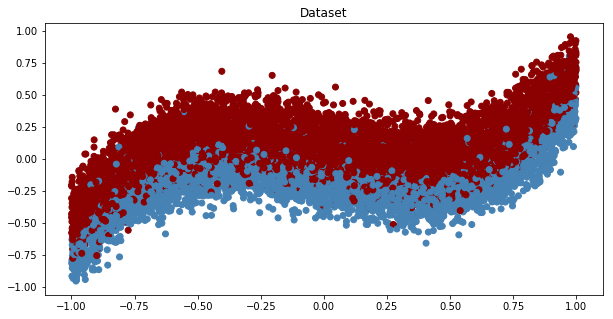

In [73]:
print_dataset(X2,y2)

In [86]:
# Parameters to be varied
C_vals = [0.001, 0.01, 0.1, 1, 10]
gamma_vals = [0.001, 0.01, 0.1, 1, 'scale']
kernel_vals = ['rbf', 'sigmoid', 'linear']
#kernel_vals = ['rbf', 'poly', 'sigmoid', 'linear']
param_grid = {'C': C_vals, 
              'kernel' : kernel_vals,
              'gamma' : gamma_vals}

SVC_CV2  = svm.SVC()

# run grid search
grid_search_SVC2 = GridSearchCV(SVC_CV2, cv=10, param_grid=param_grid, n_jobs=-1 )

# View parameters for search
grid_search_SVC2.get_params()

{'cv': 10,
 'error_score': 'raise-deprecating',
 'estimator__C': 1.0,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'auto_deprecated',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
   kernel='rbf', max_iter=-1, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=False),
 'fit_params': None,
 'iid': 'warn',
 'n_jobs': -1,
 'param_grid': {'C': [0.001, 0.01, 0.1, 1, 10],
  'kernel': ['rbf', 'sigmoid', 'linear'],
  'gamma': [0.001, 0.01, 0.1, 1, 'scale']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': 'warn',


In [87]:
# Perform GridSearch
grid_search_SVC2.fit(X2, y2)

# Build new SVM classifier based on best parameters
grid_svc2 = grid_search_SVC2.best_estimator_

In [88]:
# View best parameters
grid_search_SVC2.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [89]:
# Split into test set and training set
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [90]:
grid_svc2.fit(X2_train, y2_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

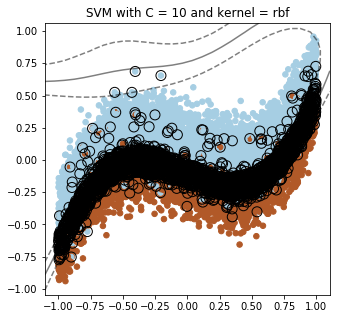

In [91]:
plot_svm_results(grid_svc2, X2_train, y2_train)

In [92]:
grid_svc.score(X2_test, y2_test)

0.4675

In [75]:
df3 = pd.read_csv("./dataset_3.csv")
df3 = df3.drop(['Unnamed: 0'],axis=1)
df3.describe()

,0,1,2
count,10000.000000,10000.000000,10000.00000
mean,-0.004890,-0.002304,0.88240
std,0.612958,0.616565,0.32215
min,-0.999962,-0.999991,0.00000
25%,-0.571095,-0.585002,1.00000
50%,-0.007848,-0.007517,1.00000
75%,0.561483,0.585625,1.00000
max,0.999805,0.999790,1.00000


In [76]:
df3.head()

,0,1,2
0,-0.532786,0.661453,1.0
1,-0.500866,0.695587,1.0
2,-0.697046,-0.116419,1.0
3,0.557011,0.332436,1.0
4,-0.012738,0.858232,1.0


In [77]:
# target attribute
y3 = df3['2']

# predictor attributes
X3 = df3.drop('2', axis=1).values

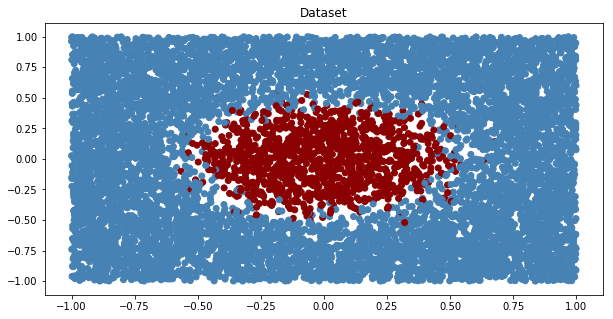

In [78]:
print_dataset(X3,y3)

In [81]:
# Parameters to be varied
C_vals = [0.001, 0.01, 0.1, 1, 10]
gamma_vals = [0.001, 0.01, 0.1, 1, 'scale']
kernel_vals = ['rbf', 'sigmoid', 'linear']
#kernel_vals = ['rbf', 'poly', 'sigmoid', 'linear']
param_grid = {'C': C_vals, 
              'kernel' : kernel_vals,
              'gamma' : gamma_vals}

SVC_CV  = svm.SVC()

# run grid search
grid_search_SVC = GridSearchCV(SVC_CV, cv=10, param_grid=param_grid, n_jobs=-1 )

# View parameters for search
grid_search_SVC.get_params()

# Perform GridSearch
grid_search_SVC.fit(X3, y3)

# Build new SVM classifier based on best parameters
grid_svc = grid_search_SVC.best_estimator_

# View best parameters
grid_search_SVC.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [82]:
# Split into test set and training set
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [83]:
grid_svc.fit(X3_train, y3_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

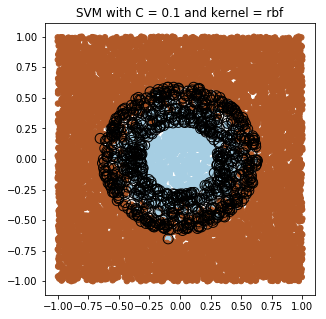

In [84]:
plot_svm_results(grid_svc, X3_train, y3_train)

In [85]:
grid_svc.score(X3_test, y3_test)

0.99

# 15 Point Example Dataset (Demo dataset)

In [226]:
# Create from 15 random entries from dataset_1
# Convert to new values by cubing original point and add original point to create new poit
X_demo = np.empty([15,2])
y_demo = np.empty([15])

random.seed(100)
idx = random.sample(range(0,1000),15)
print(idx)

for i in range(len(idx)):
    rand_idx = idx[i]
    X_demo[i] = X[rand_idx]**3+X[rand_idx]
    y_demo[i] = y[rand_idx]

[149, 470, 465, 974, 789, 178, 722, 402, 749, 358, 443, 519, 819, 112, 545]


In [227]:
print(X_demo)
print(y_demo)

[[-1.97697387  0.50151661]
 [-1.91358977 -0.33622935]
 [-0.91155473  0.36453075]
 [ 0.20042021 -0.25793884]
 [ 0.60111533 -1.41280824]
 [ 1.76452589 -1.31966776]
 [ 0.55356995 -0.27836423]
 [-1.4432535  -0.17904772]
 [-0.31295624  1.86499861]
 [ 0.31982465  0.6710673 ]
 [-0.18310293 -1.39264615]
 [ 0.97328821 -0.2178078 ]
 [ 1.02920485 -0.57257397]
 [ 0.53623081  0.69815897]
 [ 0.36510741 -0.1501749 ]]
[0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.]


In [180]:
idx = random.sample(range(0,1000),15)

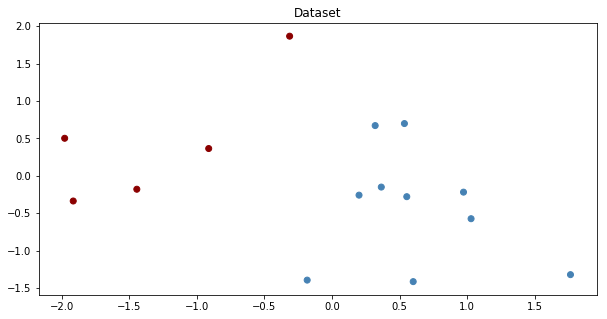

In [228]:
print_dataset(X_demo,y_demo)

In [234]:
demo_svm = svm.SVC(kernel='linear', C=10)
demo_svm.fit(X_demo,y_demo)
demo_svm.score(X_demo, y_demo)

1.0

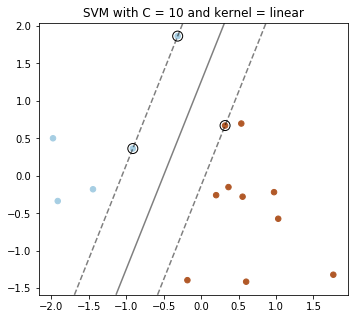

In [235]:
plot_svm_results(demo_svm, X_demo, y_demo)

In [236]:
print(demo_svm.support_vectors_)

[[-0.91155473  0.36453075]
 [-0.31295624  1.86499861]
 [ 0.31982465  0.6710673 ]]


In [237]:
demo_svm.score(X_demo, y_demo)

1.0

In [238]:
def plot_svm_results_with_orig(svmc, X, y, img_name='default.png'):
    
    plt.subplots(1, 2, figsize=(15, 5))
    
        
    plt.subplot(1,2,1)
    
    ax0 = plt.gca()
    ax0.set_aspect(aspect=1)
    plt.title('Example 15 Point Dataset')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    
    plt.subplot(1,2,2)

    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    ax.set_aspect(aspect=1)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svmc.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(svmc.support_vectors_[:, 0], svmc.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    
    # Annotate Graph
    plt.title('SVM with C = ' + str(svmc.C) + " and kernel = " + svmc.kernel)
    #plt.title('Accuracy Boxplot with Number of Selected Features = ')
    
    plt.savefig(img_name)
    plt.show()

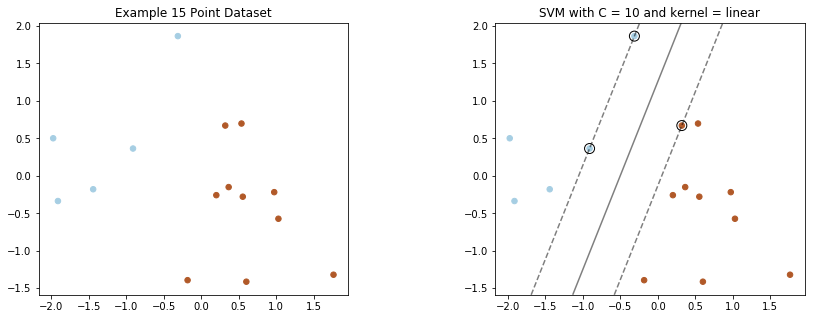

In [239]:
plot_svm_results_with_orig(demo_svm, X_demo, y_demo, 'example_dataset.png')